In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load a CSV file into a DataFrame
df = pd.read_csv('dataset.csv')

In [2]:
# df.head()

In [3]:
del df["id"]


In [4]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [5]:
# df.smoking_status.unique()

In [6]:
# df = df.dropna()

print(df.columns)
print('***'*20)
print(df.describe())

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')
************************************************************
                age  hypertension  heart_disease  avg_glucose_level   
count  43400.000000  43400.000000   43400.000000       43400.000000  \
mean      42.217894      0.093571       0.047512         104.482750   
std       22.519649      0.291235       0.212733          43.111751   
min        0.080000      0.000000       0.000000          55.000000   
25%       24.000000      0.000000       0.000000          77.540000   
50%       44.000000      0.000000       0.000000          91.580000   
75%       60.000000      0.000000       0.000000         112.070000   
max       82.000000      1.000000       1.000000         291.050000   

                bmi        stroke  
count  41938.000000  43400.000000  
mean      28.605038      0.018

In [7]:
print(df.shape)
df.drop(columns=['smoking_status'],axis=1,inplace=True)
print(df.shape)

(43400, 11)
(43400, 10)


In [8]:
len(df)

43400

In [9]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,0


In [10]:
# value_counts = df['smoking_status'].value_counts()

In [11]:
# value_counts

C:\Users\Maestro\AppData\Local\Temp\ipykernel_10956\166869066.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


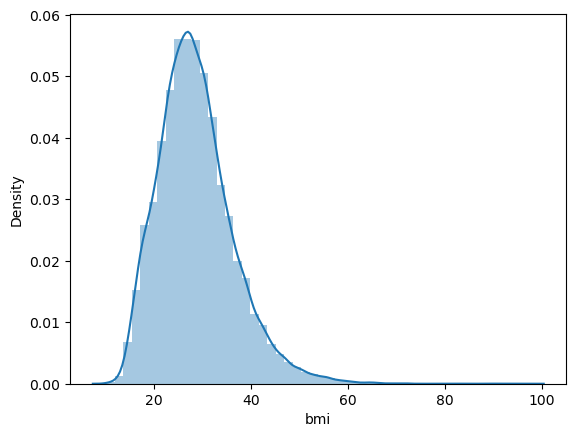

0.8987282500249906


In [12]:
sns.distplot(df['bmi'])
plt.show()
print(df['bmi'].skew())

In [13]:
df['bmi'].fillna(df['bmi'].median(),inplace=True)
print(df['bmi'].isna().sum())

0


In [14]:
print(df.columns)
print('***'*20)
print(df.describe())

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'stroke'],
      dtype='object')
************************************************************
                age  hypertension  heart_disease  avg_glucose_level   
count  43400.000000  43400.000000   43400.000000       43400.000000  \
mean      42.217894      0.093571       0.047512         104.482750   
std       22.519649      0.291235       0.212733          43.111751   
min        0.080000      0.000000       0.000000          55.000000   
25%       24.000000      0.000000       0.000000          77.540000   
50%       44.000000      0.000000       0.000000          91.580000   
75%       60.000000      0.000000       0.000000         112.070000   
max       82.000000      1.000000       1.000000         291.050000   

                bmi        stroke  
count  43400.000000  43400.000000  
mean      28.574551      0.018041  
std        7.639769

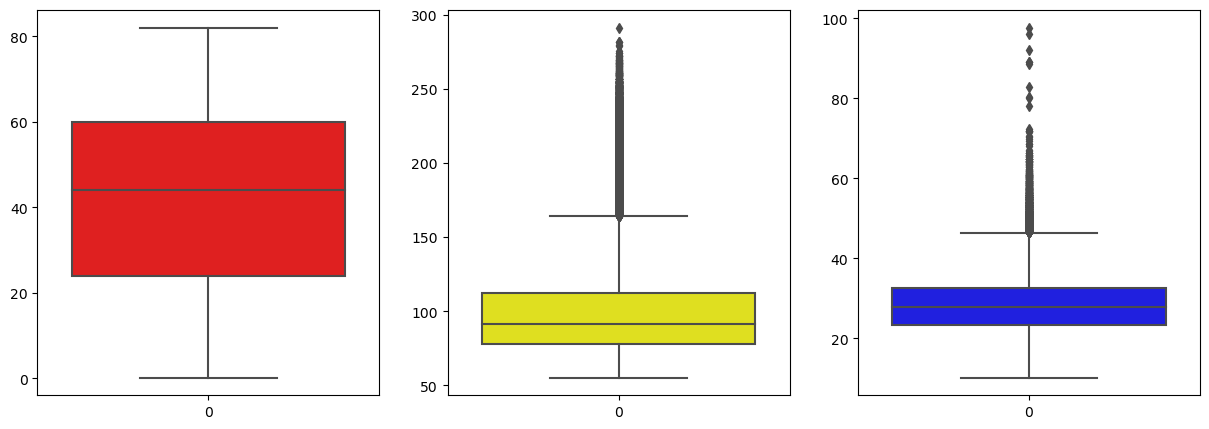

In [15]:
f,ax=plt.subplots(1,3,figsize=(15,5))
sns.boxplot(df['age'],color='red',ax=ax[0])
sns.boxplot(df['avg_glucose_level'],color='yellow',ax=ax[1])
sns.boxplot(df['bmi'],color='blue',ax=ax[2])
plt.show()


In [16]:
q1=df['avg_glucose_level'].quantile(0.25)
q3=df['avg_glucose_level'].quantile(0.75)
iqr=q3-q1
lower=q1-3*iqr
upper=q3+3*iqr

print(q1," ",iqr)

# no of extreemmmme outliers
print(df[(df['avg_glucose_level']<lower) | (df['avg_glucose_level']>upper)].shape)
print("before removing Outliers",df.shape)

print('***'*20)


# removing extremmme outliers
df=df[(df['avg_glucose_level']>=lower) & (df['avg_glucose_level']<=upper)]
print("after removing Outliers",df.shape)

# removing mild + extremmme outliers
new_df=df[(df['avg_glucose_level']>=q1-1.5*iqr) & (df['avg_glucose_level']<=q1+1.5*iqr)]

77.54   34.52999999999999
(1865, 10)
before removing Outliers (43400, 10)
************************************************************
after removing Outliers (41535, 10)


In [17]:
q1=df['bmi'].quantile(0.25)
q3=df['bmi'].quantile(0.75)
iqr=q3-q1
lower=q1-3*iqr
upper=q3+3*iqr

print(q1," ",iqr)

# no of extreemmmme outliers
print(df[(df['bmi']<lower) | (df['bmi']>upper)].shape)

df=df[(df['bmi']>=lower)&(df['bmi']<=upper)]

# removing mild + extremmme outliers
new_df=new_df[(new_df['bmi']>=q1-1.5*iqr) & (new_df['bmi']<=q1+1.5*iqr)]

23.2   9.2
(82, 10)


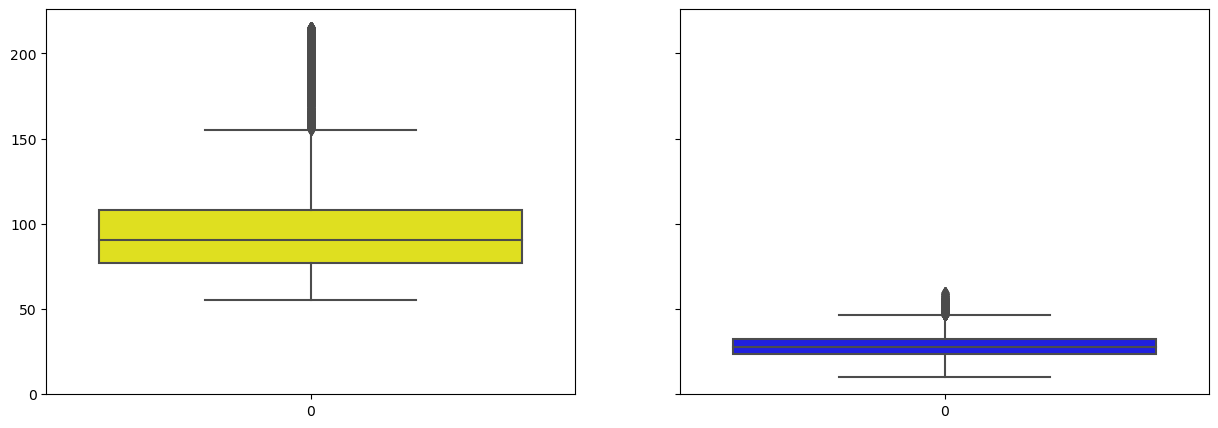

In [18]:
fig,ax=plt.subplots(1,2,figsize=(15,5),sharey=True)
sns.boxplot(df['avg_glucose_level'],color='yellow',ax=ax[0])
sns.boxplot(df['bmi'],color='blue',ax=ax[1])
plt.show()

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label_encoded_df = df.copy()

print(label_encoded_df.select_dtypes(include='O').columns)

for col in label_encoded_df.select_dtypes(include='O').columns:
    label_encoded_df[col]=le.fit_transform(label_encoded_df[col])
label_encoded_df.head()

Index(['gender', 'ever_married', 'work_type', 'Residence_type'], dtype='object')


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,1,3.0,0,0,0,4,0,95.12,18.0,0
1,1,58.0,1,0,1,2,1,87.96,39.2,0
2,0,8.0,0,0,0,2,1,110.89,17.6,0
3,0,70.0,0,0,1,2,0,69.04,35.9,0
4,1,14.0,0,0,0,1,0,161.28,19.1,0


In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label_encoded_df = df.copy()

print(label_encoded_df.select_dtypes(include='O').columns)

for col in label_encoded_df.select_dtypes(include='O').columns:
    label_encoded_df[col]=le.fit_transform(label_encoded_df[col])
label_encoded_df.head()

Index(['gender', 'ever_married', 'work_type', 'Residence_type'], dtype='object')


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,1,3.0,0,0,0,4,0,95.12,18.0,0
1,1,58.0,1,0,1,2,1,87.96,39.2,0
2,0,8.0,0,0,0,2,1,110.89,17.6,0
3,0,70.0,0,0,1,2,0,69.04,35.9,0
4,1,14.0,0,0,0,1,0,161.28,19.1,0


In [24]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,0


In [25]:
correlation=df.corr()
sns.heatmap(correlation,annot=True,cmap='PuBu',fmt=".2g",)
plt.show()

ValueError: could not convert string to float: 'Male'

In [21]:
# Мета: Розробити та впровадити single-page application (SPA) веб-додаток, який використовує класичні моделі машинного навчання та моделі глибокого навчання для розв'язання конкретних завдань у сфері охорони здоров'я.

 

# 1: Планування проекту

# 1.1. Визначити основну бізнес-ідею проекту у сфері охорони здоров'я та встановити, як саме застосування машинного навчання вирішує цю проблему або покращує існуючі практики.

# 1.2. Розробити тезисний бізнес-план, включаючи опис мети проекту, його цілей та очікуваних результатів.

# 2: Вибір та підготовка даних

# 2.1. Визначити джерела даних для конкретної медичної проблеми (наприклад, медичні записи, сигнали, зображення тощо).

# 2.2. Зібрати та підготувати дані для подальшого аналізу та моделювання.

# 2.3. Провести анотацію даних, якщо це необхідно (наприклад, розмічення сигналів або зображень лікарськими експертами). Або передбачити можливість проведення такої розмітки в процесі роботи додатку.

# 3: Розробка та навчання моделей машинного навчання

# 3.1. Вибрати відповідні моделі машинного навчання для розв'язання конкретної задачі (наприклад, класифікація, прогнозування, розпізнавання, сегментація тощо).

# 3.2. Розробити та навчити моделі (чи послідовності моделей) на підготовлених даних.

# 3.3. Оцінити якість моделей, використовуючи відповідні метрики.

# 4: Впровадження та підтримка моделей

# 4.1. Розробити single-page application (SPA) веб-додаток, який включає в себе користувацький інтерфейс для завдання вхідних даних моделям, відображення результатів та можливість взаємодії з результатами та моделями.

# 4.2. Зберегти створену на попередніх етапах модель (одним зі способів з попередньої лабораторної роботи)  та інтегрувати її у ваш SPA веб-додаток. Забезпечте можливість виконання передбачень на основі вхідних даних користувача.

# 4.3. Провести тестування (апробацію) вашого веб-додатку на предмет якості роботи моделі машинного навчання на практиці та їх відповідності вимогам поставлених у п. 1. 

# 5:  Презентація 

# 5.1. Провести презентацію проекту, включаючи оцінку результатів та можливих перспектив впровадження в медичну практику.